In [23]:
import pandas as pd 
# pandas helps us to create a new data structure ie dataframe

In [24]:
import numpy as np
#numpy is ibrary with multiple methods where we can use it

In [25]:
from sklearn import svm
#Python code that imports the SVM (Support Vector Machine) module from the scikit-learn (sklearn) library.
# SVM algorithm for various machine learning tasks, such as binary classification, multi-class classification, and regression. 

In [26]:
import matplotlib.pyplot as plt
#Matplotlib is a plotting library in Python that provides a wide range of functions for
#creating static, animated, and interactive visualizations. 

In [27]:
import seaborn as sns; 
#Seaborn is a Python data visualization library based on matplotlib.
#It provides a high-level interface for creating informative and attractive statistical graphics.

In [28]:
sns.set(font_scale=1.2) 
#font_scale value of 1.2 will increase the size of the font by 20% relative to the default size.

In [29]:
%matplotlib inline
#configures matplotlib to display its plots inline within the notebook interface.

In [30]:
import pickle
#rovides the ability to serialize and deserialize Python objects.
#Serialization refers to the process of converting Python objects into a byte stream, 
#which can then be stored in a file or transmitted over a network. Deserialization is 
#the reverse process of reconstructing the original Python objects from the byte stream

In [31]:
recipes = pd.read_csv('C:\\Users\\admin\\Downloads\\recipes_muffins_cupcakes.csv')
recipes

Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0    Muffin     55    28      3       7    5              2        0     0
1    Muffin     47    24     12       6    9              1        0     0
2    Muffin     47    23     18       6    4              1        0     0
3    Muffin     45    11     17      17    8              1        0     0
4    Muffin     50    25     12       6    5              2        1     0
5    Muffin     55    27      3       7    5              2        1     0
6    Muffin     54    27      7       5    5              2        0     0
7    Muffin     47    26     10      10    4              1        0     0
8    Muffin     50    17     17       8    6              1        0     0
9    Muffin     50    17     17      11    4              1        0     0
10  Cupcake     39     0     26      19   14              1        1     0
11  Cupcake     42    21     16      10    8              3        0     0
12  Cupcake     34    17     20      20    5              2        1     0
13  Cupcake     39    13     17      19   10              1        1     0
14  Cupcake     38    15     23      15    8              0        1     0
15  Cupcake     42    18     25       9    5              1        0     0
16  Cupcake     36    14     21      14   11              2        1     0
17  Cupcake     38    15     31       8    6              1        1     0
18  Cupcake     36    16     24      12    9              1        1     0
19  Cupcake     34    17     23      11   13              0        1     0

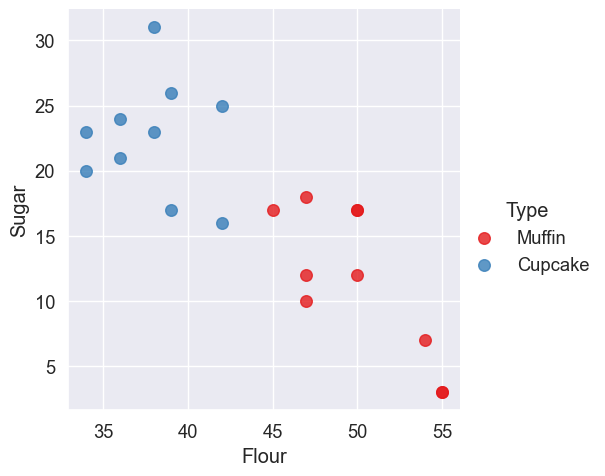

In [32]:

sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type',
#sns.lmplot() is a function in Python's Seaborn library used to create a scatter plot with a linear regression line.
           
palette='Set1', 
#The color palette used for the different categories. 'Set1' is a built-in color palette in Seaborn.
           
fit_reg=False, 
#Here it is set to False which means the function will not plot any regression line (shows correlation of two variables).
           
scatter_kws={"s": 70}); 
# Here it sets the size of the markers to be 70.

In [33]:
ingredients = recipes[['Flour','Sugar']].values 
#ingredients is a numpy array that is created by selecting the 'Flour' and 'Sugar' columns from the 'recipes'

type_label = np.where(recipes['Type']=='Muffin', 0, 1) 
#The np.where() function is used to assign a value of 0 to rows where the 'Type' column contains 'Muffin',
#and a value of 1 to rows where it contains anything else
#type_label is a numpy array that contains binary labels indicating whether each recipe is a 'Muffin' (0) or not (1). 

In [34]:
recipe_features = recipes.columns.values[1:].tolist()
#.tolist() is a method that converts the resulting NumPy array to a Python list.

#recipes is DataFrame

#recipes.columns.values :  returns an array of column names in the recipes 

#recipes.columns.values[1:] : selects all the column names starting from the second element of the array 
#ie column to last element ie last column, 

#irecipe_features variable :list of column names from the recipes DataFrame, 
#starting from the second column and going to the last column,

recipe_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [35]:
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)
#The linear kernel means that the SVM will use a linear decision boundary to separate the classes.

#"fit" method, with two arguments:

#"ingredients" represents the input data, which is a matrix of features or variables that are used to predict the output or label.
#"type_label" represents the output data, which is a vector of labels or categories that correspond to each row of the input data.

SVC(kernel='linear')

In [36]:
#calculates the coordinates of the decesion boundary (hyperplane) and the margins(perpendicular distance betw hyperplane and positive hyperplane and negative hypreplane)
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])


#w : extracts learned weights (coefficients) from the SVM model, which are stored in model.coef.

#a : calculates the slope of the decision boundary (which is a straight line) using the learned weights.

#xx : generates a sequence of evenly spaced values between 30 and 60, which is used as the x-coordinates for plotting the 
#decision boundary and margins.

#yy :calculates the y-coordinates which is a straight line with slope a 

#yy_down and yy_up are calculated as the y-coordinates of the lower and upper margins, respectively. 
#These are also straight lines with slope a.

#model.support_vectors_ is an array that stores the coordinates of the support vectors in the feature space, 

#model.support_vectors_[0] and model.support_vectors_[-1] are the first and last support vectors, respectively.

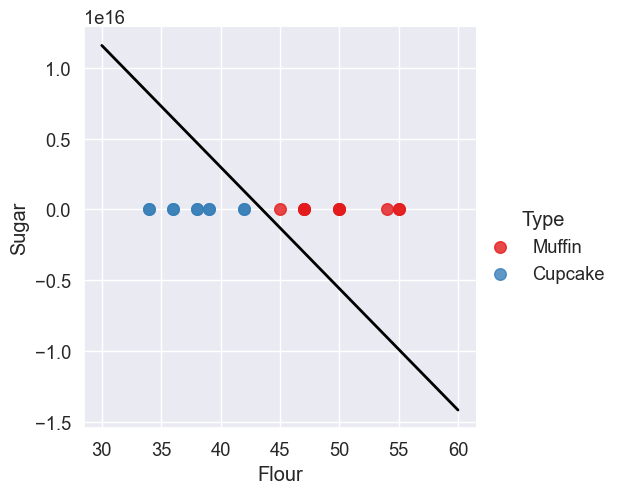

In [37]:
# Plot the hyperplane
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');
#hue='Type': The column type ko alag alag colour apply karta hai for each category in column type 
#palette : set1 ffrom seaborn library ke andar ke colors provide karta hai to hue

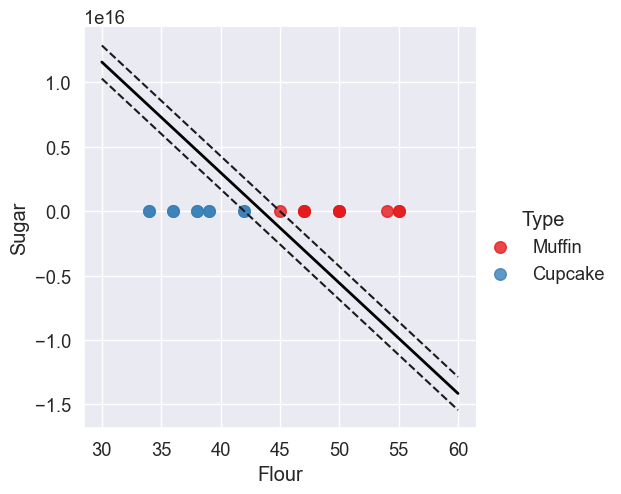

In [38]:
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
 s=80, facecolors='none');
#facecolors='none' specifies that the markers should be unfilled.
#model.support_vectors : contains the coordinates of the support vectors

In [39]:
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [40]:
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50, 20)

You're looking at a muffin recipe!


In [ ]:
# sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
# plt.plot(xx, yy, linewidth=2, color='black')
# plt.plot(50, 20, 'yo', markersize='9');
#'yo' parameter specifies that the point should be yellow and circular in shape

In [ ]:
muffin_or_cupcake(40,20)


In [ ]:
muffin_cupcake_dict = {'muffin_cupcake_model': model, 'muffin_cupcake_features': ['Flour','Sugar'], 'all_features': recipe_features}

# dictionary is likely being used to store information related to the muffin-cupcake classification model,